# Préparation des Données - Performance des Étudiants

## Objectifs

Après avoir complété ce notebook, vous serez capable de :

- Gérer les valeurs manquantes dans les ensembles de données
- Corriger les formats de données
- Standardiser et normaliser les données
- Créer des groupes à partir de variables continues
- Générer des variables indicatrices à partir de données catégorielles en utilisant l'encodage one-hot

## Table des Matières

1. [Importation des Données et Bibliothèques](#import-data)
2. [Exploration des Données](#data-exploration)
3. [Gestion des Valeurs Manquantes](#missing-values)
4. [Correction des Formats de Données](#data-formats)
5. [Standardisation des Données](#standardization)
6. [Normalisation des Données](#normalization)
7. [Discrétisation des Données](#binning)
8. [Encodage One-Hot (Variables Indicatrices/Variables Dummy)](#indicator-variables)
9. [Exportation des Données Nettoyées](#export-data)

<a id="import-data"></a>
## 1. Importation des Données et Bibliothèques

In [2]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration du style de visualisation
sns.set_theme(style="whitegrid")
%matplotlib inline

In [3]:
# Lecture du jeu de données
file_path = "Classeur1.csv"
df = pd.read_csv(file_path, sep=';')

# Affichage des premières lignes du jeu de données
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,100000,36 months,1144,32948,B,B4,Marketing,10+ years,RENT,1170000,...,01-06-90,160,0,363690,418.0,250,w,INDIVIDUAL,0.0,0.0
1,80000,36 months,1199,26568,B,B5,Credit analyst,4 years,MORTGAGE,650000,...,01-07-04,170,0,201310,533.0,270,f,INDIVIDUAL,30.0,0.0
2,156000,36 months,1049,50697,B,B3,Statistician,< 1 year,RENT,430570,...,01-08-07,130,0,119870,922.0,260,f,INDIVIDUAL,0.0,0.0
3,72000,36 months,649,22065,A,A2,Client Advocate,6 years,RENT,540000,...,01-09-06,60,0,54720,215.0,130,f,INDIVIDUAL,0.0,0.0
4,243750,60 months,1727,60933,C,C5,Destiny Management Inc.,9 years,MORTGAGE,550000,...,01-03-99,130,0,245840,698.0,430,f,INDIVIDUAL,10.0,0.0


<a id="data-exploration"></a>
## 2. Exploration des Données

Avant de commencer le nettoyage et la préparation de nos données, comprenons d'abord ce avec quoi nous travaillons.

In [4]:
# Obtenir des informations de base sur le jeu de données
print("Dimensions du jeu de données:", df.shape)
print("\nInformations sur le jeu de données:")
df.info()

Dimensions du jeu de données: (396030, 26)

Informations sur le jeu de données:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  int64  
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  int64  
 3   installment           396030 non-null  int64  
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  int64  
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               39

In [5]:
# Obtenir un résumé statistique du jeu de données
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,141138.880893,1250.175714,39314.077666,7.782099e+05,1562.102119,113.111532,1.781910,1.584454e+05,538.331332,254.147438,18.139908,1.216476
std,83574.413411,539.828663,26412.949444,8.137573e+05,925.265762,51.376488,5.306706,2.059184e+05,248.238561,118.869907,21.479305,3.561743
min,5000.000000,60.000000,285.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,20.000000,0.000000,0.000000
25%,80000.000000,967.000000,19926.000000,4.500000e+05,881.000000,80.000000,0.000000,6.025000e+04,358.000000,170.000000,0.000000,0.000000
50%,120000.000000,1299.000000,34465.000000,6.463500e+05,1552.000000,100.000000,0.000000,1.118100e+05,548.000000,240.000000,10.000000,0.000000
75%,200000.000000,1588.000000,53906.000000,9.000000e+05,2209.000000,140.000000,0.000000,1.962000e+05,729.000000,320.000000,30.000000,0.000000
max,400000.000000,3099.000000,153381.000000,8.706582e+07,99990.000000,900.000000,860.000000,1.743266e+07,9446.000000,1510.000000,340.000000,80.000000


In [6]:
# Vérifier les doublons
print(f"Nombre de lignes dupliquées: {df.duplicated().sum()}")

Nombre de lignes dupliquées: 0


Explorons les variables catégorielles dans notre jeu de données :

In [8]:
# Vérifier les valeurs uniques dans chaque colonne catégorielle
categorical_columns = ["loan_status", "home_ownership", "purpose", "term", "grade", "emp_length"]

for column in categorical_columns:
    print(f"\nValeurs uniques dans {column}:")
    print(df[column].value_counts())


Valeurs uniques dans loan_status:
loan_status
Fully Paid     318357
Charged Off     77673
Name: count, dtype: int64

Valeurs uniques dans home_ownership:
home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: count, dtype: int64

Valeurs uniques dans purpose:
purpose
debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: count, dtype: int64

Valeurs uniques dans term:
term
36 months    302005
60 months     94025
Name: count, dtype: int64

Valeurs uniques dans grade:
grade
B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
N

In [31]:
mort_acc = df["mort_acc"].unique()
print(mort_acc)

[  0.  30.  10.  40.  20.  60.  50.  nan 100.  70. 120. 110.  80.  90.
 130. 140. 220. 340. 150. 250. 190. 160. 170. 320. 180. 240. 210. 200.
 310. 280. 300. 230. 260. 270.]


<a id="missing-values"></a>
## 3. Gestion des Valeurs Manquantes

Vérifions s'il y a des valeurs manquantes dans notre jeu de données et traitons-les de manière appropriée.

In [9]:
# Vérifier les valeurs manquantes de toutes les colonnes
missing_values = df.isnull().sum()
print("Valeurs manquantes dans chaque colonne:")
print(missing_values)

Valeurs manquantes dans chaque colonne:
loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
dtype: int64


In [73]:
features = df[["loan_amnt", "annual_inc", "loan_status", "purpose", "pub_rec_bankruptcies","grade","sub_grade","emp_length", "emp_title"]]
features.head()

,loan_amnt,annual_inc,loan_status,purpose,pub_rec_bankruptcies,grade,sub_grade,emp_length,emp_title
0,100000,1170000,Fully Paid,vacation,0.0,B,B4,10+ years,Marketing
1,80000,650000,Fully Paid,debt_consolidation,0.0,B,B5,4 years,Credit analyst
2,156000,430570,Fully Paid,credit_card,0.0,B,B3,< 1 year,Statistician
3,72000,540000,Fully Paid,credit_card,0.0,A,A2,6 years,Client Advocate
4,243750,550000,Charged Off,credit_card,0.0,C,C5,9 years,Destiny Management Inc.


In [74]:
missing_values = features.isna().sum()
print("Valeurs manquantes dans chaque colonne:")
print(missing_values)


Valeurs manquantes dans chaque colonne:
loan_amnt                   0
annual_inc                  0
loan_status                 0
purpose                     0
pub_rec_bankruptcies      535
grade                       0
sub_grade                   0
emp_length              18301
emp_title               22927
dtype: int64


In [75]:
features["pub_rec_bankruptcies"].value_counts()

pub_rec_bankruptcies
0.0     350380
10.0     42790
20.0      1847
30.0       351
40.0        82
50.0        32
60.0         7
70.0         4
80.0         2
Name: count, dtype: int64

Si nous trouvons des valeurs manquantes, nous pouvons les traiter en utilisant différentes méthodes :

1. **Supprimer les lignes avec des valeurs manquantes**
2. **Remplacer les valeurs manquantes par la moyenne, la médiane ou le mode**
3. **Remplacer les valeurs manquantes selon une stratégie spécifique**

Mettons en œuvre ces stratégies selon les besoins :

In [ ]:
# Exemple: S'il y avait des valeurs manquantes dans les colonnes numériques, nous pourrions les remplacer par la moyenne
numerical_columns = ['math_score', 'reading_score', 'writing_score']

for column in numerical_columns:
    if df[column].isnull().sum() > 0:
        mean_value = df[column].mean()
        df[column].fillna(mean_value, inplace=True)
        print(f"Valeurs manquantes remplacées dans {column} par la moyenne: {mean_value:.2f}")

In [76]:
# Exemple: S'il y avait des valeurs manquantes dans les colonnes catégorielles, nous pourrions les remplacer par le mode
for column in features:
    if features[column].isnull().sum() > 0:
        mode_value = features[column].mode()[0]
        features[column].fillna(mode_value, inplace=True)
        print(f"Valeurs manquantes remplacées dans {column} par le mode: {mode_value}")

Valeurs manquantes remplacées dans pub_rec_bankruptcies par le mode: 0.0
Valeurs manquantes remplacées dans emp_length par le mode: 10+ years
Valeurs manquantes remplacées dans emp_title par le mode: Teacher


/var/folders/np/_5hqzh552rjft_zc9xgjsh640000gn/T/ipykernel_13996/1134553474.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  features[column].fillna(mode_value, inplace=True)
/var/folders/np/_5hqzh552rjft_zc9xgjsh640000gn/T/ipykernel_13996/1134553474.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[column].fillna(mode_value, inp

<a id="data-formats"></a>
## 4. Correction des Formats de Données

Vérifions les types de données de nos colonnes et assurons-nous qu'ils sont au format correct.

In [77]:
# Vérifier les types de données
features.dtypes

loan_amnt                 int64
annual_inc                int64
loan_status              object
purpose                  object
pub_rec_bankruptcies    float64
grade                    object
sub_grade                object
emp_length               object
emp_title                object
dtype: object

In [78]:
# Convertir les types de données si nécessaire
# Par exemple, s'assurer que les colonnes numériques sont du type correct
for column in features:
    if features[column].dtype == 'int64':
        features[column] = features[column].astype('float')

# Vérifier les types de données
features.dtypes

/var/folders/np/_5hqzh552rjft_zc9xgjsh640000gn/T/ipykernel_13996/3881251265.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[column] = features[column].astype('float')
/var/folders/np/_5hqzh552rjft_zc9xgjsh640000gn/T/ipykernel_13996/3881251265.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[column] = features[column].astype('float')


loan_amnt               float64
annual_inc              float64
loan_status              object
purpose                  object
pub_rec_bankruptcies    float64
grade                    object
sub_grade                object
emp_length               object
emp_title                object
dtype: object

In [79]:
features["pub_rec_bankruptcies"] = features["pub_rec_bankruptcies"].astype("int64")

/var/folders/np/_5hqzh552rjft_zc9xgjsh640000gn/T/ipykernel_13996/667026039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features["pub_rec_bankruptcies"] = features["pub_rec_bankruptcies"].astype("int64")


In [80]:
features.dtypes

loan_amnt               float64
annual_inc              float64
loan_status              object
purpose                  object
pub_rec_bankruptcies      int64
grade                    object
sub_grade                object
emp_length               object
emp_title                object
dtype: object

<a id="standardization"></a>
## 5. Standardisation des Données

La standardisation des données est le processus de transformation des données en un format commun qui permet une comparaison significative.

In [ ]:
# Créons une nouvelle fonctionnalité : score moyen
df['average_score'] = (df['math_score'] + df['reading_score'] + df['writing_score']) / 3
df['average_score'] = df['average_score'].round(2)

# Afficher les premières lignes avec la nouvelle colonne
df.head()

In [ ]:
# Créer une colonne réussite/échec basée sur le score moyen (exemple de standardisation)
# En supposant que 60 est le score de passage
df['pass_status'] = np.where(df['average_score'] >= 60, 'Réussite', 'Échec')

# Afficher les premières lignes avec la nouvelle colonne
df.head()

In [81]:
# from emp_length take the numeric value
features["emp_length_num"] = features["emp_length"].str.replace("years", "").str.replace("year", "").str.replace("", "").str.replace(" ", "").str.replace("< 1 year", "0").str.replace("n/a", "").str.replace("+", "").str.replace("<1", "0").astype('float')
features.head()



/var/folders/np/_5hqzh552rjft_zc9xgjsh640000gn/T/ipykernel_13996/1049823757.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features["emp_length_num"] = features["emp_length"].str.replace("years", "").str.replace("year", "").str.replace("", "").str.replace(" ", "").str.replace("< 1 year", "0").str.replace("n/a", "").str.replace("+", "").str.replace("<1", "0").astype('float')


,loan_amnt,annual_inc,loan_status,purpose,pub_rec_bankruptcies,grade,sub_grade,emp_length,emp_title,emp_length_num
0,100000.0,1170000.0,Fully Paid,vacation,0,B,B4,10+ years,Marketing,10.0
1,80000.0,650000.0,Fully Paid,debt_consolidation,0,B,B5,4 years,Credit analyst,4.0
2,156000.0,430570.0,Fully Paid,credit_card,0,B,B3,< 1 year,Statistician,0.0
3,72000.0,540000.0,Fully Paid,credit_card,0,A,A2,6 years,Client Advocate,6.0
4,243750.0,550000.0,Charged Off,credit_card,0,C,C5,9 years,Destiny Management Inc.,9.0


In [82]:
features["emp_length_num"].value_counts()

emp_length_num
10.0    144342
2.0      35827
0.0      31725
3.0      31665
5.0      26495
1.0      25882
4.0      23952
6.0      20841
7.0      20819
8.0      19168
9.0      15314
Name: count, dtype: int64

In [83]:
features["emp_length_num"] = features["emp_length_num"].astype("int64")
features.dtypes

/var/folders/np/_5hqzh552rjft_zc9xgjsh640000gn/T/ipykernel_13996/431206554.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features["emp_length_num"] = features["emp_length_num"].astype("int64")


loan_amnt               float64
annual_inc              float64
loan_status              object
purpose                  object
pub_rec_bankruptcies      int64
grade                    object
sub_grade                object
emp_length               object
emp_title                object
emp_length_num            int64
dtype: object

<a id="normalization"></a>
## 6. Normalisation des Données

La normalisation est le processus de transformation des valeurs de plusieurs variables dans une plage similaire. Les techniques courantes de normalisation comprennent :

1. **Mise à l'échelle Min-Max** : Met les valeurs à l'échelle dans une plage fixe de 0 à 1
2. **Normalisation Z-score** : Standardise les valeurs en fonction de la moyenne et de l'écart-type

Appliquons ces techniques à nos données numériques :

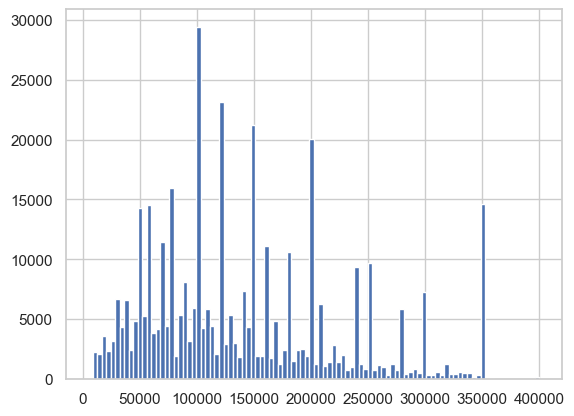

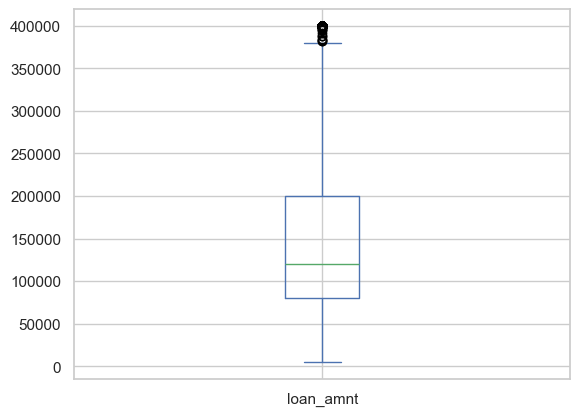

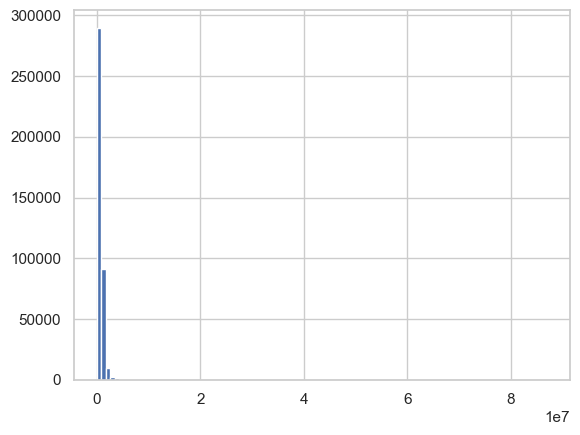

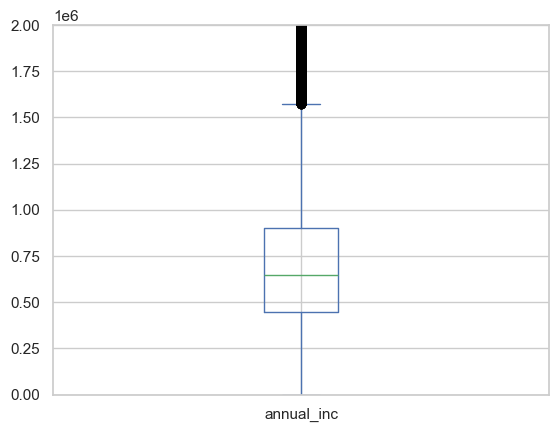

In [84]:
# Histogram of loan amount
features["loan_amnt"].hist(bins=100)
plt.show()

# Boxplot of loan amount
features["loan_amnt"].plot(kind="box")
plt.show()

# Histogram of annual income
features["annual_inc"].hist(bins=100)
plt.show()

# Boxplot of annual income
features["annual_inc"].plot(kind="box", ylim=(0, 2000000))
plt.show()

In [ ]:
features_clipped = features

### Normalisation Min-Max

In [85]:
# Mise à l'échelle Min-Max
# si colonne est numérique
for column in features:
    if features[column].dtype == "float64" and "normalized" not in features[column].name and "standardized" not in features[column].name:
        column_min = features[column].min()
        column_max = features[column].max()
        features[f'{column}_normalized'] = (features[column] - column_min) / (column_max - column_min)

/var/folders/np/_5hqzh552rjft_zc9xgjsh640000gn/T/ipykernel_13996/1897581921.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[f'{column}_normalized'] = (features[column] - column_min) / (column_max - column_min)
/var/folders/np/_5hqzh552rjft_zc9xgjsh640000gn/T/ipykernel_13996/1897581921.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[f'{column}_normalized'] = (features[column] - column_min) / (column_max - column_min)


### Clipping aux quartiles 25 et 75

In [99]:
# Mise à l'échelle Min-Max
# si colonne est numérique
for column in features:
    if features[column].dtype == "float64" and "normalized" not in features[column].name and "standardized" not in features[column].name:
        column_min = 0
        column_max = features[column].quantile(0.75)
        features[f'{column}_clipped_normalized'] = (features[column] - column_min) / (column_max - column_min)



/var/folders/np/_5hqzh552rjft_zc9xgjsh640000gn/T/ipykernel_13996/1180994345.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[f'{column}_clipped_normalized'] = (features[column] - column_min) / (column_max - column_min)
/var/folders/np/_5hqzh552rjft_zc9xgjsh640000gn/T/ipykernel_13996/1180994345.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[f'{column}_clipped_normalized'] = (features[column] - column_min) / (column_max - column_min)


In [87]:
# Normalisation Z-score
for column in features:
    if features[column].dtype == "float64" and "normalized" not in features[column].name and "standardized" not in features[column].name:
        mean = features[column].mean()
        std = features[column].std()
        features[f'{column}_standardized'] = (features[column] - mean) / std

/var/folders/np/_5hqzh552rjft_zc9xgjsh640000gn/T/ipykernel_13996/4238590542.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[f'{column}_standardized'] = (features[column] - mean) / std
/var/folders/np/_5hqzh552rjft_zc9xgjsh640000gn/T/ipykernel_13996/4238590542.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[f'{column}_standardized'] = (features[column] - mean) / std


In [88]:
features.head()

,loan_amnt,annual_inc,loan_status,purpose,pub_rec_bankruptcies,grade,sub_grade,emp_length,emp_title,emp_length_num,loan_amnt_normalized,annual_inc_normalized,loan_amnt_clipped_normalized,annual_inc_clipped_normalized,loan_amnt_standardized,annual_inc_standardized
0,100000.0,1170000.0,Fully Paid,vacation,0,B,B4,10+ years,Marketing,10,0.240506,0.013438,0.166667,1.600000,-0.492243,0.481458
1,80000.0,650000.0,Fully Paid,debt_consolidation,0,B,B5,4 years,Credit analyst,4,0.189873,0.007466,0.000000,0.444444,-0.731550,-0.157553
2,156000.0,430570.0,Fully Paid,credit_card,0,B,B3,< 1 year,Statistician,0,0.382278,0.004945,0.633333,-0.043178,0.177819,-0.427203
3,72000.0,540000.0,Fully Paid,credit_card,0,A,A2,6 years,Client Advocate,6,0.169620,0.006202,-0.066667,0.200000,-0.827273,-0.292728
4,243750.0,550000.0,Charged Off,credit_card,0,C,C5,9 years,Destiny Management Inc.,9,0.604430,0.006317,1.364583,0.222222,1.227782,-0.280440


Visualisons la distribution des scores originaux et normalisés :

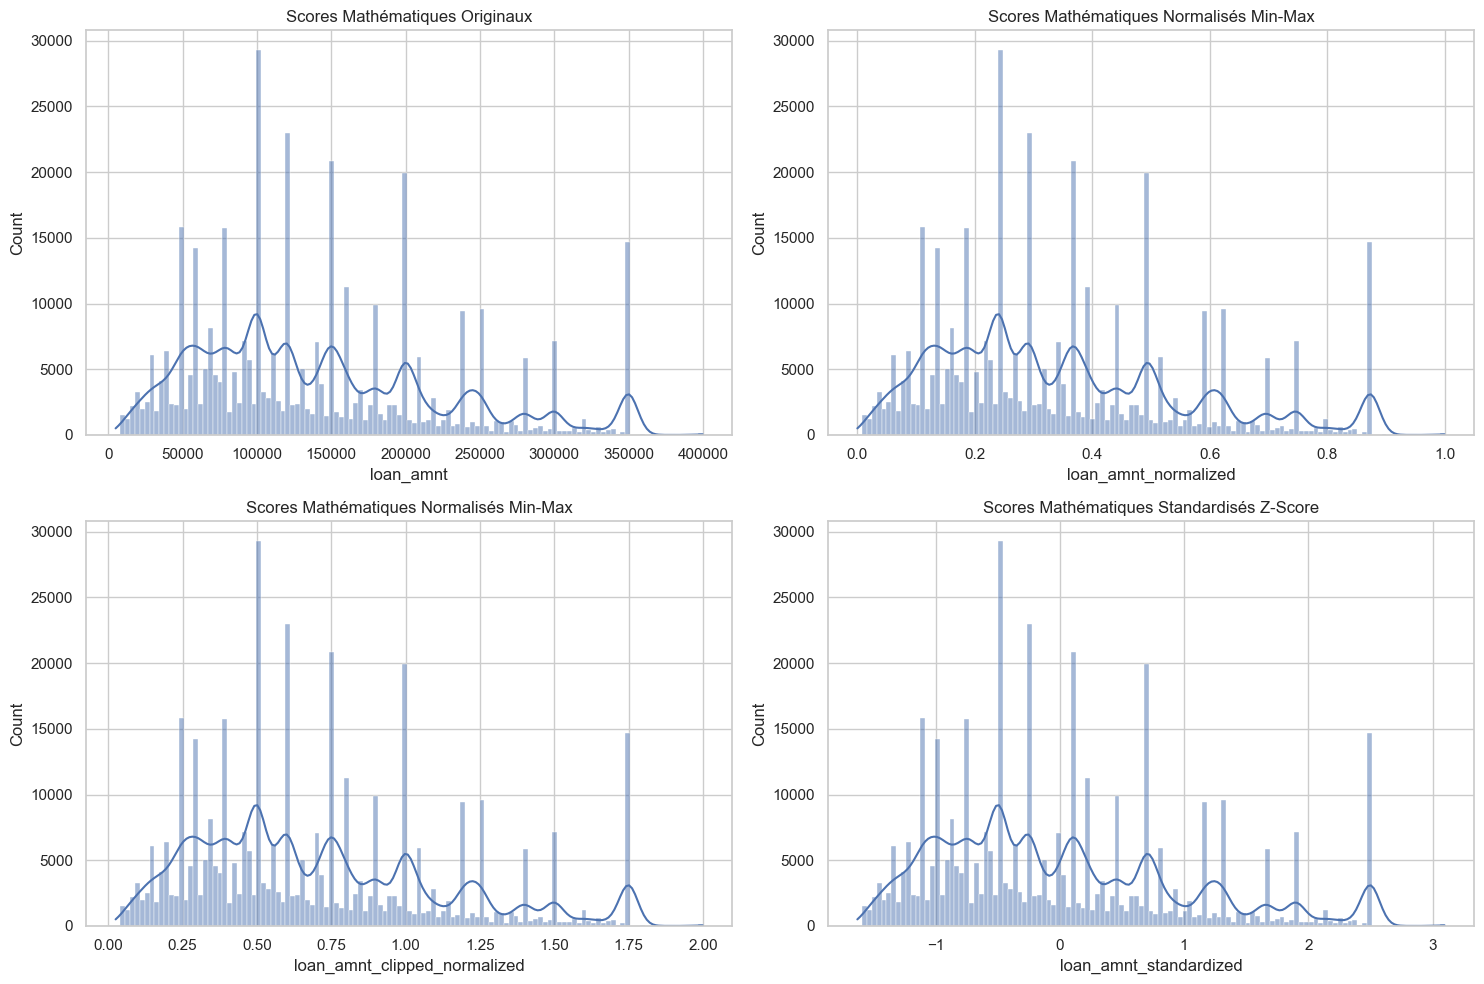

In [100]:
# Visualisation des données originales vs normalisées pour le score en mathématiques
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(features['loan_amnt'], kde=True)
plt.title('Scores Mathématiques Originaux')

plt.subplot(2, 2, 2)
sns.histplot(features['loan_amnt_normalized'], kde=True)
plt.title('Scores Mathématiques Normalisés Min-Max')

plt.subplot(2, 2, 3)
sns.histplot(features['loan_amnt_clipped_normalized'], kde=True)
plt.title('Scores Mathématiques Normalisés Min-Max')

plt.subplot(2, 2, 4)
sns.histplot(features['loan_amnt_standardized'], kde=True)
plt.title('Scores Mathématiques Standardisés Z-Score')

plt.tight_layout()
plt.show()

<a id="binning"></a>
## 7. Discrétisation

La discrétisation est un processus de transformation des variables numériques continues en 'bins' catégoriels discrets pour une analyse groupée.

In [106]:
# Regroupement des scores mathématiques en catégories
bins = [0, 10, 30, 80] 
labels = ["Excellent", "Moyen", "Faible"]
features['pub_rec_bankruptcies_category'] = pd.cut(features['pub_rec_bankruptcies'], bins=bins, labels=labels, include_lowest=True)

/var/folders/np/_5hqzh552rjft_zc9xgjsh640000gn/T/ipykernel_13996/2247363678.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['pub_rec_bankruptcies_category'] = pd.cut(features['pub_rec_bankruptcies'], bins=bins, labels=labels, include_lowest=True)


In [105]:
# Compter le nombre d'étudiants dans chaque groupe
pub_rec_bankruptcies_category_counts = features['pub_rec_bankruptcies_category'].value_counts().sort_index()
print(pub_rec_bankruptcies_category_counts)

pub_rec_bankruptcies_category
Excellent    393705
Moyen          2198
Faible          127
Name: count, dtype: int64


In [ ]:
# Visualiser les données regroupées
plt.figure(figsize=(10, 6))
sns.countplot(x='math_score_category', data=df, palette='viridis')
plt.title('Distribution des Catégories de Scores en Mathématiques')
plt.xlabel('Catégorie de Score en Mathématiques')
plt.ylabel('Effectif')
plt.show()

<a id="indicator-variables"></a>
## 8. Encodage One-Hot (Variables Indicatrices/Variables Dummy)

L'encodage one-hot crée des colonnes binaires (0 ou 1) pour chaque catégorie dans les variables catégorielles. Ces variables sont également connues sous le nom de variables indicatrices ou variables dummy. Cette technique est essentielle pour inclure des données catégorielles dans des modèles statistiques qui nécessitent des entrées numériques.

In [ ]:
# Créer des variables dummy pour le genre en utilisant l'encodage one-hot
gender_dummies = pd.get_dummies(df['gender'], prefix='gender')
gender_dummies.head()

In [ ]:
# Créer des variables dummy pour la race/ethnicité en utilisant l'encodage one-hot
race_dummies = pd.get_dummies(df['race/ethnicity'], prefix='race')
race_dummies.head()

In [ ]:
# Créer des variables dummy pour le cours de préparation aux tests en utilisant l'encodage one-hot
test_prep_dummies = pd.get_dummies(df['test_prep_course'], prefix='test_prep')
test_prep_dummies.head()

In [ ]:
# Fusionner les variables dummy avec le dataframe original
df_with_dummies = pd.concat([df, gender_dummies, race_dummies, test_prep_dummies], axis=1)

# Afficher les premières lignes du dataframe avec les variables dummy
df_with_dummies.head()

Nous pouvons supprimer les colonnes catégorielles d'origine si nous voulons ne conserver que les variables dummy :

In [ ]:
# Créer une copie du dataframe pour cet exemple
df_encoded = df_with_dummies.copy()

# Supprimer les colonnes d'origine (conserver une version pour référence)
columns_to_drop = ['gender', 'race/ethnicity', 'test_prep_course']
df_encoded = df_encoded.drop(columns=columns_to_drop)

# Afficher les premières lignes du dataframe encodé
df_encoded.head()

<a id="export-data"></a>
## 9. Exportation des Données Nettoyées

Maintenant que nous avons nettoyé et transformé nos données, nous pouvons les exporter pour une analyse ultérieure.

In [ ]:
# Exporter le dataframe original avec les fonctionnalités ajoutées
df.to_csv('cleaned_students_performance_fr.csv', index=False)

# Exporter le dataframe avec les variables dummy
df_with_dummies.to_csv('students_performance_with_dummies_fr.csv', index=False)

# Exporter le dataframe entièrement encodé
df_encoded.to_csv('students_performance_encoded_fr.csv', index=False)

print("Données exportées avec succès !")

## Résumé

Dans ce notebook, nous avons :

1. Importé et exploré le jeu de données de performance des étudiants
2. Vérifié et traité les valeurs manquantes
3. Corrigé les formats de données
4. Standardisé les données en créant de nouvelles fonctionnalités
5. Normalisé les données numériques en utilisant la mise à l'échelle min-max et la standardisation z-score
6. Créé des groupes pour les variables continues
7. Généré des variables indicatrices pour les données catégorielles en utilisant l'encodage one-hot
8. Exporté les données nettoyées et transformées pour une analyse ultérieure

Ces techniques de préparation de données sont essentielles pour préparer les données brutes à l'analyse et à la modélisation.